<a href="https://colab.research.google.com/github/gabrieltorquato/portfolio/blob/main/Analisando_os_Dados_do_Airbnb_Amsterd%C3%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Amsterdã*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Amsterdã, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Iremos utilizar os dados disponibilizados no [Inside Airbnb](http://insideairbnb.com/get-the-data/).

Para essa análise inicial, iremos baixar apenas o arquivo:
* `listings.csv` - *Summary information and metrics for listings in Amsterdam (good for visualisations).*

In [29]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [30]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2022-06-05/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - Número gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número gerado para identificar o anfitrião
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Essa coluna não contém valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Latitude da propriedade
* `longitude` - Longitude da propriedade
* `room_type` - Tipo de quarto oferecido
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que o local possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias disponibilizados dentro de 365 dias
* `number_of_reviews_ltm` - Número de reviews no último mês
* `license` - De acordo com a lei, alguns aluguéis necessitam de licença.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [32]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
2,31553121,Quiet Guesthouse near Amsterdam,76806621,Ralf,NaN,Noord-West,52.43237,4.91821,Entire home/apt,152,2,82,2022-05-29,2.02,1,3,26,NaN
3,34745823,"Apartment ' Landzicht', nearby Amsterdam",238083700,Daisy,NaN,Gaasperdam - Driemond,52.29620,5.01231,Entire home/apt,87,2,39,2022-04-17,1.08,3,290,4,NaN
4,44586947,"Weesp, 2 kamers vlakbij Amsterdam",360838688,Aranka,NaN,Gaasperdam - Driemond,52.31475,5.03030,Private room,160,2,15,2022-05-29,0.68,1,152,12,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [33]:
# identificando o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
display(df.dtypes)


Entradas:	 6173
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem aproximadamente 9,5% dos valores nulos
* A variável `license` têm aproximadamente 6,7% dos valores nulos.

In [34]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                   9.557751
last_review                         9.557751
license                             6.722825
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para entender a distribuição das variáveis, irei plotar um histograma.

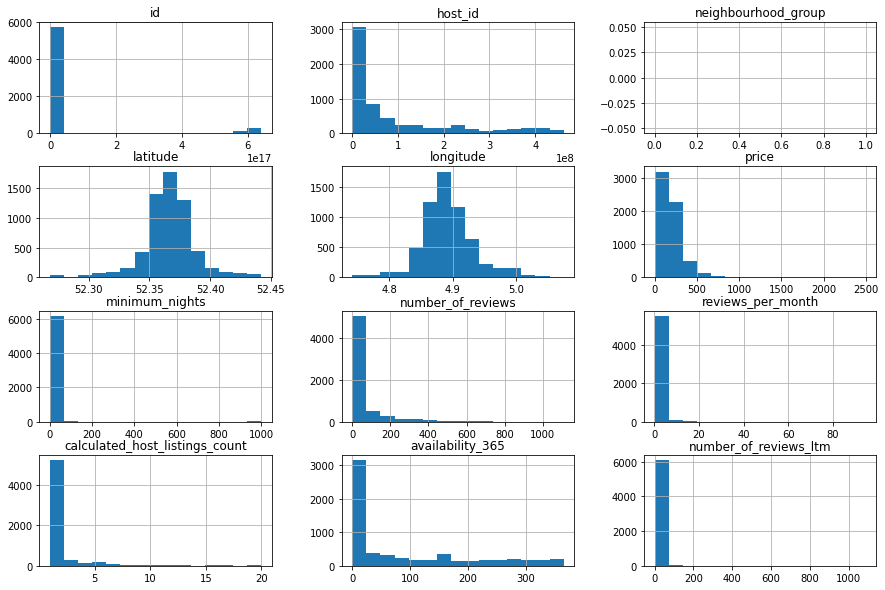

In [35]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize=(15,10));

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price` e `minimum_nights`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

### **Q4. Há outliers presentes?** 

In [36]:
## Ver o resumo estatístico das variáveis numéricas.

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6173.000000,6173.000000,6173.000000,5583.000000,6173.000000,6173.000000
mean,198.019601,4.497813,50.760408,1.211241,2.043253,87.994168
std,140.546979,31.221594,94.366924,2.249919,2.833791,112.572382
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,115.000000,2.000000,4.000000,0.260000,1.000000,0.000000
50%,160.000000,2.000000,17.000000,0.570000,1.000000,23.000000
75%,240.000000,3.000000,48.000000,1.430000,2.000000,158.000000
max,2500.000000,1001.000000,1110.000000,94.880000,20.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 240, porém seu valor máximo é 2500.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

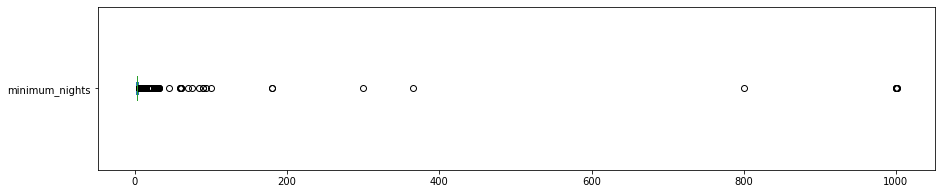

minimum_nights acima de 30:
26 entradas
0.4212%


In [37]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver a quantidade acima de 30 dias:

print("minimum_nights acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

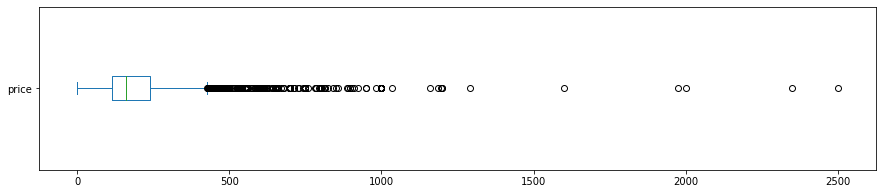

locações acima de 1500:
5 entradas
0.0810%


In [38]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 1500
print("locações acima de 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

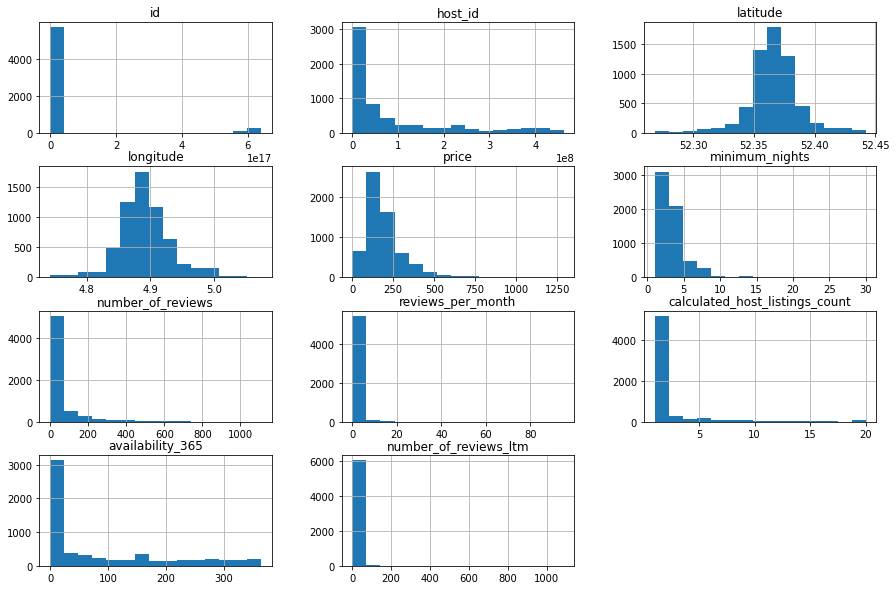

In [39]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

###**Q5. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.032140,-0.170382,-0.076100,0.071969,0.191141
minimum_nights,-0.032140,1.000000,-0.133245,-0.146603,-0.098770,-0.061738
number_of_reviews,-0.170382,-0.133245,1.000000,0.647442,-0.004317,0.203263
reviews_per_month,-0.076100,-0.146603,0.647442,1.000000,0.101964,0.268506
calculated_host_listings_count,0.071969,-0.098770,-0.004317,0.101964,1.000000,0.360078
availability_365,0.191141,-0.061738,0.203263,0.268506,0.360078,1.000000


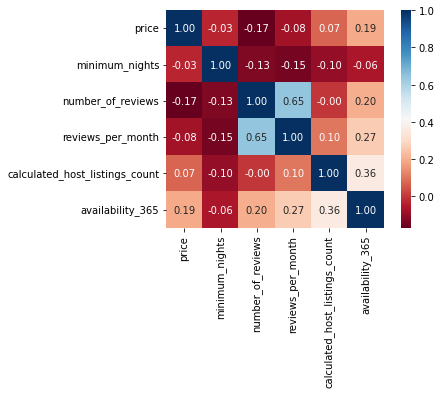

In [41]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(corr)
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square = True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [42]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()


Entire home/apt    4199
Private room       1833
Hotel room           78
Shared room          32
Name: room_type, dtype: int64

In [43]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.room_type.shape[0]) * 100


Entire home/apt    68.365353
Private room       29.843699
Hotel room          1.269945
Shared room         0.521003
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**



In [44]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]

neighbourhood
Centrum-Oost                237.730897
Centrum-West                229.082833
Zuid                        211.197861
De Pijp - Rivierenbuurt     209.416244
Oud-Noord                   206.456349
De Baarsjes - Oud-West      196.273341
Westerpark                  195.178313
IJburg - Zeeburgereiland    188.975460
Buitenveldert - Zuidas      184.917355
Geuzenveld - Slotermeer     183.346535
Name: price, dtype: float64

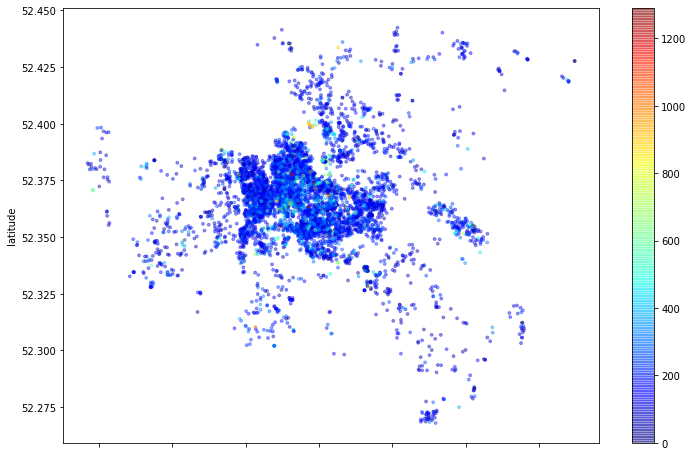

In [45]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x ='longitude', y = 'latitude', alpha=0.4, c=df_clean['price'],
        s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [46]:
# ver a média da coluna `minimum_nights``

df_clean['minimum_nights'].mean()

3.2377075871051773

### **Q9. Qual a média dos preços de aluguel?**

In [47]:
# ver a média da coluna `price``
df_clean['price'].mean()

196.5871051774666

## Conclusões

Por mais que essa seja uma análise superficial de dados resumidos, podemos chegar à algumas conclusões.

Os valores médios de aluguel estão por volta de `197 Euros`, com uma quantidade mínima média de noites de `3`. Totalizando um custo de `591 Euros` para uma estadia de fim de semana.

**68%** dos imóveis alugados são casas/apartamentos inteiros, o que indica maior `privacidade/conforto` na sua estadia.

Se você busca economizar na sua estadia, fuja dos bairros Centrais:
* Centrum-Oost
* Centrum-West
* Zuid

Esse é um dataset mais resumido em que não podemos analisar os melhores locais para sua estadia de acordo com os reviews, para minha próxima análise, vou buscar o dataset mais completo, trazendo assim mais insights valiosos.